# Titanic Project - Machine Learning to create a model that predicts which passengers survived the titanic ship Prediction (Classification)


In [195]:
import numpy as np

# Python tool box
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# to test data
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# to ensure the accuracy
from sklearn.metrics import accuracy_score




# Redaing Data

In [196]:

train = pd.read_csv(r'train.csv')
test = pd.read_csv(r'test.csv')





In [197]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Exploration

In [198]:


train.head(10)
train.sample()
train.tail()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [199]:
train.shape


(891, 12)

In [200]:

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [201]:

train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [202]:

null = train.isnull().sum()
null[null > 0]


Age         177
Cabin       687
Embarked      2
dtype: int64

AxesSubplot(0.125,0.125;0.62x0.755)


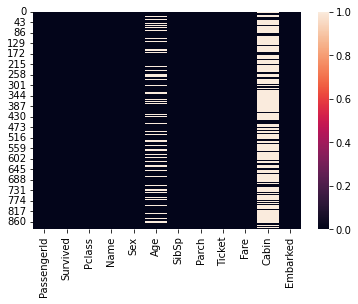

In [203]:

print(sns.heatmap(train.isnull()))

# Data Cleaning

In [204]:
def clean(dataset):
    dataset.drop(['Cabin', 'Name', 'Ticket', 'Embarked', 'Fare'], axis=1, inplace=True) # one means a column and 0 as a row
    dataset.Age = dataset.Age.fillna(dataset.Age.mean())
    dataset.dropna()  # for more confirmation
    
    return dataset

In [205]:
clean(train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.000000,1,0
1,2,1,1,female,38.000000,1,0
2,3,1,3,female,26.000000,0,0
3,4,1,1,female,35.000000,1,0
4,5,0,3,male,35.000000,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0
887,888,1,1,female,19.000000,0,0
888,889,0,3,female,29.699118,1,2
889,890,1,1,male,26.000000,0,0


In [206]:
clean(test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.50000,0,0
1,893,3,female,47.00000,1,0
2,894,2,male,62.00000,0,0
3,895,3,male,27.00000,0,0
4,896,3,female,22.00000,1,1
...,...,...,...,...,...,...
413,1305,3,male,30.27259,0,0
414,1306,1,female,39.00000,0,0
415,1307,3,male,38.50000,0,0
416,1308,3,male,30.27259,0,0


In [207]:
null = train.isnull().sum()
null[null > 0]

Series([], dtype: int64)

<AxesSubplot:>

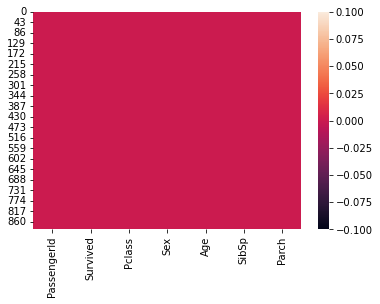

In [208]:
sns.heatmap(train.isnull())

# Data Analysis

In [209]:
co = train.corr() #to find the correlation between items - relationship
co

,PassengerId,Survived,Pclass,Age,SibSp,Parch
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000


<AxesSubplot:>

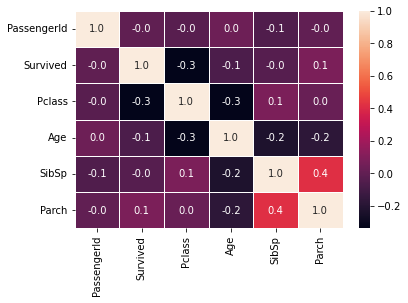

In [210]:
sns.heatmap(co, annot=True, fmt='.1f', linewidths=.5)

<AxesSubplot:ylabel='Survived'>

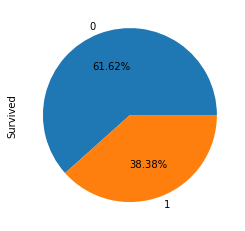

In [211]:
train.Survived.value_counts().plot.pie(autopct='%0.2f%%')

<AxesSubplot:ylabel='Sex'>

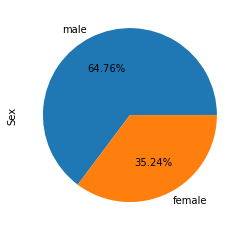

In [212]:
train.Sex.value_counts().plot.pie(autopct='%0.2f%%')

C:\Users\Reda Ibrahim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

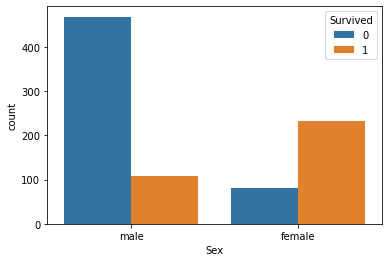

In [213]:
sns.countplot(train.Sex, hue=train.Survived)

C:\Users\Reda Ibrahim\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

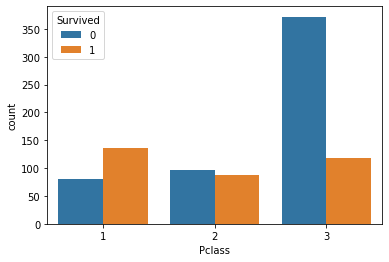

In [214]:
sns.countplot(train.Pclass, hue=train.Survived)

<AxesSubplot:xlabel='Age', ylabel='Count'>

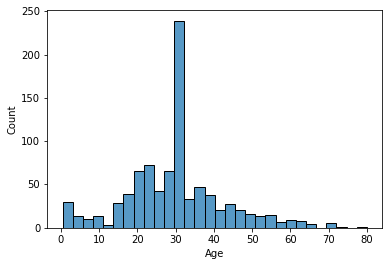

In [215]:
sns.histplot(train.Age)

# Transform Data

In [216]:
train.Sex = pd.get_dummies(train['Sex'], drop_first=True) # convert data to numerucal


In [217]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.000000,1,0
1,2,1,1,0,38.000000,1,0
2,3,1,3,0,26.000000,0,0
3,4,1,1,0,35.000000,1,0
4,5,0,3,1,35.000000,0,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0
887,888,1,1,0,19.000000,0,0
888,889,0,3,0,29.699118,1,2
889,890,1,1,1,26.000000,0,0


In [218]:
test.Sex = pd.get_dummies(test['Sex'], drop_first=True)

In [219]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,1,34.50000,0,0
1,893,3,0,47.00000,1,0
2,894,2,1,62.00000,0,0
3,895,3,1,27.00000,0,0
4,896,3,0,22.00000,1,1
...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0
414,1306,1,0,39.00000,0,0
415,1307,3,1,38.50000,0,0
416,1308,3,1,30.27259,0,0


# Create a Model

In [220]:
#Features

x = train.drop(['Survived'], axis=1) # all the data except Survived and 1 means columns  # Input

y = train['Survived']   # target or output

In [221]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,1,3,1,22.000000,1,0
1,2,1,0,38.000000,1,0
2,3,3,0,26.000000,0,0
3,4,1,0,35.000000,1,0
4,5,3,1,35.000000,0,0
...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0
887,888,1,0,19.000000,0,0
888,889,3,0,29.699118,1,2
889,890,1,1,26.000000,0,0


In [222]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [223]:
X_train,x_test,y_train,y_test = train_test_split(x, y, train_size=.8, random_state=42) # 80% of data for training

In [224]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch
331,332,1,1,45.500000,0,0
733,734,2,1,23.000000,0,0
382,383,3,1,32.000000,0,0
704,705,3,1,26.000000,1,0
813,814,3,0,6.000000,4,2
...,...,...,...,...,...,...
106,107,3,0,21.000000,0,0
270,271,1,1,29.699118,0,0
860,861,3,1,41.000000,2,0
435,436,1,0,14.000000,1,2


In [225]:
x_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch
709,710,3,1,29.699118,1,1
439,440,2,1,31.000000,0,0
840,841,3,1,20.000000,0,0
720,721,2,0,6.000000,0,1
39,40,3,0,14.000000,1,0
...,...,...,...,...,...,...
433,434,3,1,17.000000,0,0
773,774,3,1,29.699118,0,0
25,26,3,0,38.000000,1,5
84,85,2,0,17.000000,0,0


In [226]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [227]:
accuracies = []

def predict(model):
    result = model()
    result.fit(X_train, y_train)
    predicted = result.predict(x_test)
    
    print(predicted)
    accu = accuracy_score(predicted, y_test)
    print('accuracy is ', accu)
    
    accuracies.append(accu)
    

In [228]:
model1 = predict(DecisionTreeClassifier)
model1



[0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1
 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0]
accuracy is  0.6927374301675978


In [229]:
model2 = predict(RandomForestClassifier)
model2

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]
accuracy is  0.8212290502793296


In [230]:
model3 = predict(GradientBoostingClassifier)
model3

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1]
accuracy is  0.8212290502793296


In [231]:
model4 = predict(DecisionTreeClassifier)
model4

[0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1
 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1
 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0]
accuracy is  0.6815642458100558


In [232]:
model5 = predict(KNeighborsClassifier)
model5

[0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1
 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0]
accuracy is  0.553072625698324


In [233]:
model6 = predict(GaussianNB)
model6

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1
 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1]
accuracy is  0.770949720670391


In [234]:
model7 = predict(SVC)
model7

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
accuracy is  0.5865921787709497


In [235]:

algorithms = ['DecisionTreeClassifier', 'RandomForestClassifier', 'GradientBoostingClassifier', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'GaussianNB', 'SVC']

In [236]:
pd.DataFrame({'ALgorithms': algorithms, 'accuracies': accuracies })

,ALgorithms,accuracies
0,DecisionTreeClassifier,0.692737
1,RandomForestClassifier,0.821229
2,GradientBoostingClassifier,0.821229
3,DecisionTreeClassifier,0.681564
4,KNeighborsClassifier,0.553073
5,GaussianNB,0.770950
6,SVC,0.586592


In [237]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,1,22.000000,1,0
1,2,1,1,0,38.000000,1,0
2,3,1,3,0,26.000000,0,0
3,4,1,1,0,35.000000,1,0
4,5,0,3,1,35.000000,0,0
...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0
887,888,1,1,0,19.000000,0,0
888,889,0,3,0,29.699118,1,2
889,890,1,1,1,26.000000,0,0


In [238]:

model = GradientBoostingClassifier()
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [239]:
final_prediction = model.predict(test)


In [240]:
final_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [241]:
final = test.PassengerId
final

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [242]:
new_data = pd.DataFrame({'PassengerId':final,'Survived' :final_prediction})
new_data

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [243]:
accuracy_score(test, final_prediction)

AttributeError: 'DataFrame' object has no attribute 'Survived'

In [244]:
new_data.to_csv('MySubmission.csv', index=False)